In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

from experiments_core import run_tests_splits
from experiments_core import run_one_experiment
from experiments_core import print_baseline_results
from experiments_core import default_tokenize
from experiments_core import tokenize_stems
from experiments_core import tokenize_lemmas
from experiments_core import tokenize_no_urls
from experiments_core import tokenize_norm_letters
from experiments_core import save_excel_results

from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import importlib
import sys
importlib.reload(sys.modules[run_tests_splits.__module__])
importlib.reload(sys.modules[run_one_experiment.__module__])
importlib.reload(sys.modules[print_baseline_results.__module__])
importlib.reload(sys.modules[default_tokenize.__module__])
importlib.reload(sys.modules[tokenize_stems.__module__])
importlib.reload(sys.modules[tokenize_lemmas.__module__])
importlib.reload(sys.modules[tokenize_no_urls.__module__])
importlib.reload(sys.modules[tokenize_norm_letters.__module__])
importlib.reload(sys.modules[save_excel_results.__module__])

<module 'experiments_core' from '/home/ctorres9/EAFIT/trabajogrado/experiments/experiments_core.py'>

In [3]:
file_path = 'data/TweetsPolaridadSEPLN.csv'
original_tweets_df = pd.read_csv(file_path, index_col=None, header=0, sep='\t')
print(original_tweets_df.describe())
print(original_tweets_df.head())

                      tweetid          user               content  \
count                   60798         60798                 60798   
unique                  60798           158                 60405   
top      178550469680054272,0  mariviromero  Buenos días a todos!   
freq                        1          7138                   111   

                       date   lang polarity  topic  
count                 60798  60798    60798  60798  
unique                60510      1        6     10  
top     2011-12-11T12:56:51     es     NONE  otros  
freq                      4  60798    21416  28189  
                 tweetid            user  \
0   142378325086715904,0     jesusmarana   
1   142379080808013824,0       EvaORegan   
2   142379173120442368,0  LosadaPescador   
3   142379815708803072,0    mgilguerrero   
4   142381190123499520,0  pedroj_ramirez   

                                             content                 date  \
0  Portada 'Público', viernes. Fabra al banquil

In [4]:
strong_negative_tweets = original_tweets_df[original_tweets_df.polarity == 'N+'][['content','polarity']]
standar_negative_tweets = original_tweets_df[original_tweets_df.polarity == 'N'][['content','polarity']]

strong_positive_tweets = original_tweets_df[original_tweets_df.polarity == 'P+'][['content','polarity']]
standar_positive_tweets = original_tweets_df[original_tweets_df.polarity == 'P'][['content','polarity']]

negative_tweets = pd.concat([strong_negative_tweets,standar_negative_tweets], ignore_index=True)
positive_tweets = pd.concat([strong_positive_tweets,standar_positive_tweets], ignore_index=True)

negative_tweets.polarity = "negative"
positive_tweets.polarity = "positive"

total_tweets = pd.concat([negative_tweets,positive_tweets], ignore_index=True)
print(total_tweets.describe())
print(total_tweets.head())

                                                  content  polarity
count                                               38077     38077
unique                                              37926         2
top     ¡Noticias descombacantes! está disponible! htt...  positive
freq                                                   63     22233
                                             content  polarity
0  Dado q la deuda privada es superior a la publi...  negative
1  TEPCO inyecta nitrógeno en los reactores de Fu...  negative
2  “@Declaracion: «Cualquier injusticia contra un...  negative
3  ¡Qué estrés!, la presidenta de la diputación d...  negative
4  Hoy entrego mi credencial en el Congreso. Una ...  negative


In [5]:
total_data_content = total_tweets.content
total_data_target = total_tweets.polarity

In [6]:
X_train, X_test, y_train, y_test = train_test_split(total_data_content, 
                                                    total_data_target, 
                                                    test_size=0.3, 
                                                    random_state=80)

In [8]:
print("Positivos entrenamiento:", len(y_train[y_train == 'positive']))
print("Negativos entrenamiento:", len(y_train[y_train == 'negative']))
print("Positivos pruebas:", len(y_test[y_test == 'positive']))
print("Negativos pruebas:", len(y_test[y_test == 'negative']))

Positivos entrenamiento: 15552
Negativos entrenamiento: 11101
Positivos pruebas: 6681
Negativos pruebas: 4743


# Experimentos con el clasificador SVM lineal
Los siguientes son los experimentos realizados para el clasificador SVM con kernel radial y con los diferentes metodos de ponderación para el modelo de espacio vectorial.

# Linea base

In [9]:
tf_vect_baseline = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True)

tf_idf_vect_baseline = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True)

binary_vect_baseline = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True)

In [10]:
parameters_svm_lineal = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

## Linea base y parametros optimos SVM Lineal

### TF BaseLine

In [10]:
%%time
tf_baseline_results = run_tests_splits(total_data_content, total_data_target, tf_vect_baseline, parameters_svm_lineal, LinearSVC())

random state:  10
train time: 25.250s
random state:  20
train time: 21.363s
random state:  30
train time: 17.654s
random state:  40
train time: 15.000s
random state:  50
train time: 13.717s
random state:  60
train time: 12.908s
random state:  70
train time: 12.049s
random state:  80
train time: 49.132s
random state:  90
train time: 36.606s
random state:  100
train time: 31.707s
CPU times: user 55.3 s, sys: 27.5 s, total: 1min 22s
Wall time: 4min 18s


Numero de caracteristicas:  (26653, 48349)

Best score selected:  0.9062769669455596
Best Accuracy:  0.9064250700280112
Best Best F1-score:  0.9034998317485456
Best random state:  40
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9062769669455596
C: 0.1


Exactitud: 0.9064250700280112
F1_score: 0.9034998317485456
Precision: 0.9040325516076527
Recall: 0.9029924552693348

             precision    recall  f1-score   support

   negative     0.8906    0.8829    0.8867      4738
   positive     0.9175    0.9231    0.9203      6686

avg / total     0.9063    0.9064    0.9064     11424

[[4183  555]
 [ 514 6172]]

Confusion matrix, without normalization
[[4183  555]
 [ 514 6172]]


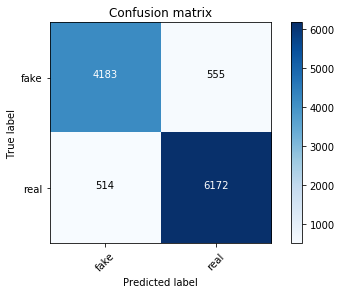

In [11]:
print_baseline_results(tf_baseline_results, parameters_svm_lineal)

### TF-IDF BaseLine

In [12]:
%%time
tf_idf_baseline_results = run_tests_splits(total_data_content, total_data_target, tf_idf_vect_baseline, parameters_svm_lineal, LinearSVC())

random state:  10
train time: 24.405s
random state:  20
train time: 32.938s
random state:  30
train time: 28.833s
random state:  40
train time: 26.227s
random state:  50
train time: 25.707s
random state:  60
train time: 24.673s
random state:  70
train time: 20.812s
random state:  80
train time: 46.172s
random state:  90
train time: 54.316s
random state:  100
train time: 41.304s
CPU times: user 51.3 s, sys: 34.3 s, total: 1min 25s
Wall time: 5min 57s


Numero de caracteristicas:  (26653, 48372)

Best score selected:  0.9071399092034668
Best Accuracy:  0.9019607843137255
Best Best F1-score:  0.8991777905193801
Best random state:  30
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9071399092034668
C: 1


Exactitud: 0.9019607843137255
F1_score: 0.8991777905193801
Precision: 0.8991777905193801
Recall: 0.8991777905193801

             precision    recall  f1-score   support

   negative     0.8824    0.8824    0.8824      4763
   positive     0.9159    0.9159    0.9159      6661

avg / total     0.9020    0.9020    0.9020     11424

[[4203  560]
 [ 560 6101]]

Confusion matrix, without normalization
[[4203  560]
 [ 560 6101]]


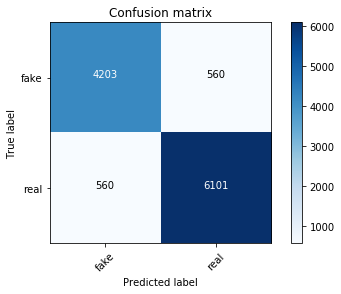

In [13]:
print_baseline_results(tf_idf_baseline_results, parameters_svm_lineal)

### Binary BaseLine

In [14]:
%%time
binary_baseline_results = run_tests_splits(total_data_content, total_data_target, binary_vect_baseline, parameters_svm_lineal, LinearSVC())

random state:  10
train time: 29.462s
random state:  20
train time: 30.264s
random state:  30
train time: 27.649s
random state:  40
train time: 27.566s
random state:  50
train time: 26.638s
random state:  60
train time: 29.538s
random state:  70
train time: 26.300s
random state:  80
train time: 23.041s
random state:  90
train time: 25.135s
random state:  100
train time: 35.812s
CPU times: user 1min, sys: 43.4 s, total: 1min 43s
Wall time: 5min 22s


Numero de caracteristicas:  (26653, 48349)

Best score selected:  0.9058642554309083
Best Accuracy:  0.9031862745098039
Best Best F1-score:  0.9001691955932347
Best random state:  40
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9058642554309083
C: 0.1


Exactitud: 0.9031862745098039
F1_score: 0.9001691955932347
Precision: 0.9006572835318389
Recall: 0.899702786781146

             precision    recall  f1-score   support

   negative     0.8864    0.8793    0.8828      4738
   positive     0.9149    0.9201    0.9175      6686

avg / total     0.9031    0.9032    0.9031     11424

[[4166  572]
 [ 534 6152]]

Confusion matrix, without normalization
[[4166  572]
 [ 534 6152]]


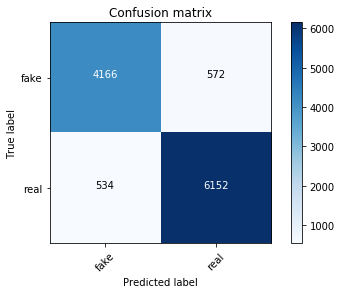

In [15]:
print_baseline_results(binary_baseline_results, parameters_svm_lineal)

In [18]:
all_experiments_results = []

## Prueba de la linea base con los parametros optimos
Esta prueba se hace para validar los resultados obtenidos anteriormente. Si esta bien debe dar lo mismo o un resultado muy similar dependiendo del clasificador.

### TF BaseLine

Numero de caracteristicas:  (26653, 48349)

train time: 2.881s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9062769669455596
C: 0.1

Exactitud: 0.9064250700280112
F1_score: 0.9034998317485456
Precision: 0.9040325516076527
Recall: 0.9029924552693348

             precision    recall  f1-score   support

   negative     0.8906    0.8829    0.8867      4738
   positive     0.9175    0.9231    0.9203      6686

avg / total     0.9063    0.9064    0.9064     11424

[[4183  555]
 [ 514 6172]]

Confusion matrix, without normalization
[[4183  555]
 [ 514 6172]]
CPU times: user 2.39 s, sys: 1.39 s, total: 3.78 s
Wall time: 4.34 s


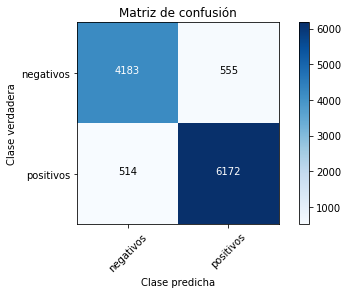

In [102]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_baseline = run_one_experiment(total_data_content, total_data_target, tf_vect_baseline, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_tf_vect_baseline)

### TF-IDF BaseLine

Numero de caracteristicas:  (26653, 48372)

train time: 2.369s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9071399092034668
C: 1

Exactitud: 0.9019607843137255
F1_score: 0.8991777905193801
Precision: 0.8991777905193801
Recall: 0.8991777905193801

             precision    recall  f1-score   support

   negative     0.8824    0.8824    0.8824      4763
   positive     0.9159    0.9159    0.9159      6661

avg / total     0.9020    0.9020    0.9020     11424

[[4203  560]
 [ 560 6101]]

Confusion matrix, without normalization
[[4203  560]
 [ 560 6101]]
CPU times: user 2.22 s, sys: 1.34 s, total: 3.56 s
Wall time: 3.79 s


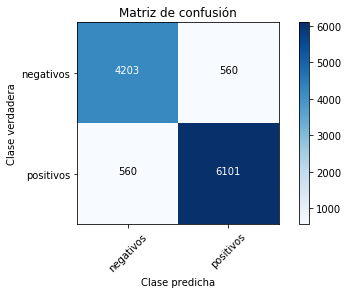

In [103]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_idf_vect_baseline = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_baseline, optimal_parameters, LinearSVC(), 30)
all_experiments_results.append(clf_tf_idf_vect_baseline)

### Binary BaseLine

Numero de caracteristicas:  (26653, 48349)

train time: 3.067s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9058642554309083
C: 0.1

Exactitud: 0.9031862745098039
F1_score: 0.9001691955932347
Precision: 0.9006572835318389
Recall: 0.899702786781146

             precision    recall  f1-score   support

   negative     0.8864    0.8793    0.8828      4738
   positive     0.9149    0.9201    0.9175      6686

avg / total     0.9031    0.9032    0.9031     11424

[[4166  572]
 [ 534 6152]]

Confusion matrix, without normalization
[[4166  572]
 [ 534 6152]]
CPU times: user 2.4 s, sys: 1.7 s, total: 4.1 s
Wall time: 4.53 s


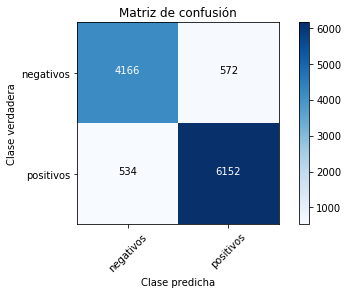

In [104]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_baseline = run_one_experiment(total_data_content, total_data_target, binary_vect_baseline, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_binary_vect_baseline)

## Experimento 1: Remocion de stop words

In [11]:
spanish_stopwords = stopwords.words('spanish')

In [12]:
tf_vect_stopwords = CountVectorizer(stop_words = spanish_stopwords,
                                    analyzer = 'word',
                                    tokenizer = default_tokenize,
                                    lowercase = True)
tf_idf_vect_stopwords = TfidfVectorizer(stop_words = spanish_stopwords,
                                        analyzer = 'word',
                                        tokenizer = default_tokenize,
                                        lowercase = True)
binary_vect_stopwords = CountVectorizer(stop_words = spanish_stopwords,
                                        analyzer = 'word',
                                        tokenizer = default_tokenize,
                                        lowercase = True,
                                        binary=True)

### TF stop words

Numero de caracteristicas:  (26653, 48099)

train time: 7.654s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8941207368776498
C: 0.1

Exactitud: 0.8960084033613446
F1_score: 0.8925900538178619
Precision: 0.8937906288672992
Recall: 0.8915105459679803

             precision    recall  f1-score   support

   negative     0.8819    0.8651    0.8734      4738
   positive     0.9057    0.9179    0.9118      6686

avg / total     0.8958    0.8960    0.8959     11424

[[4099  639]
 [ 549 6137]]

Confusion matrix, without normalization
[[4099  639]
 [ 549 6137]]


NameError: name 'all_experiments_results' is not defined

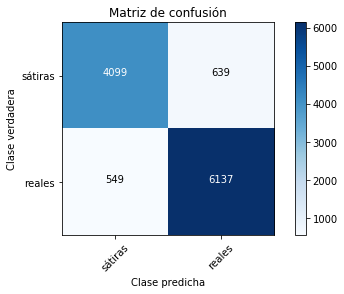

In [13]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_stopwords = run_one_experiment(total_data_content, total_data_target, tf_vect_stopwords, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_tf_vect_stopwords)

### TF-IDF stop words

Numero de caracteristicas:  (26653, 48118)

train time: 3.470s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8952087945071849
C: 1

Exactitud: 0.8946078431372549
F1_score: 0.8912823612221249
Precision: 0.8925929176567187
Recall: 0.8901205222423524

             precision    recall  f1-score   support

   negative     0.8816    0.8631    0.8723      4763
   positive     0.9036    0.9171    0.9103      6661

avg / total     0.8944    0.8946    0.8944     11424

[[4111  652]
 [ 552 6109]]

Confusion matrix, without normalization
[[4111  652]
 [ 552 6109]]
CPU times: user 2.32 s, sys: 2.03 s, total: 4.35 s
Wall time: 4.96 s


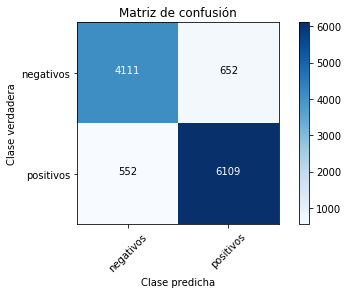

In [108]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_idf_vect_stopwords = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_stopwords, optimal_parameters, LinearSVC(), 30)
all_experiments_results.append(clf_tf_idf_vect_stopwords)

### Binary stop words

Numero de caracteristicas:  (26653, 48099)

train time: 3.160s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8935579484485799
C: 0.1

Exactitud: 0.8975840336134454
F1_score: 0.8941832586155181
Precision: 0.8955367740218523
Recall: 0.8929796288105145

             precision    recall  f1-score   support

   negative     0.8846    0.8660    0.8752      4738
   positive     0.9064    0.9200    0.9132      6686

avg / total     0.8974    0.8976    0.8974     11424

[[4103  635]
 [ 535 6151]]

Confusion matrix, without normalization
[[4103  635]
 [ 535 6151]]
CPU times: user 2.35 s, sys: 1.92 s, total: 4.27 s
Wall time: 4.63 s


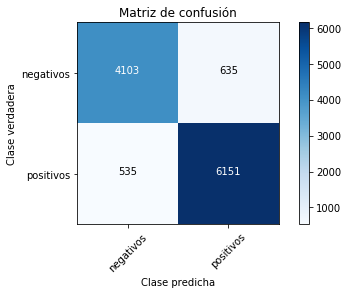

In [109]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_stopwords = run_one_experiment(total_data_content, total_data_target, binary_vect_stopwords, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_binary_vect_stopwords)

## Experimento 2: Stemming

In [19]:
#Prueba tokenize_stems
print(tokenize_stems(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaa', 'com', 'estas', 'estaa', 'cre', 'en', 'mi', 'si', 'llov', 'mañan', 'tu', 'cre', 'en', 'mi', 'cart', 'aeiou']


In [22]:
tf_vect_stemming = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True)

tf_idf_vect_stemming = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True)

binary_vect_stemming = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True,
                binary=True)

### TF stemming

Numero de caracteristicas:  (26653, 32900)

train time: 9.149s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9095786590627697
C: 0.1

Exactitud: 0.907125350140056
F1_score: 0.9041492561100909
Precision: 0.9050176459738091
Recall: 0.9033447472570154

             precision    recall  f1-score   support

   negative     0.8934    0.8812    0.8873      4738
   positive     0.9166    0.9255    0.9210      6686

avg / total     0.9070    0.9071    0.9070     11424

[[4175  563]
 [ 498 6188]]

Confusion matrix, without normalization
[[4175  563]
 [ 498 6188]]
CPU times: user 15.8 s, sys: 7.66 s, total: 23.4 s
Wall time: 24 s


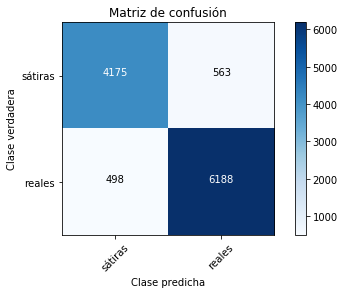

In [23]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_stemming = run_one_experiment(total_data_content, total_data_target, tf_vect_stemming, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_tf_vect_stemming)

### TF-IDF stemming

Numero de caracteristicas:  (26653, 32850)

train time: 2.829s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9082654860616066
C: 1

Exactitud: 0.9035364145658263
F1_score: 0.9006780583036793
Precision: 0.9011801481527448
Recall: 0.900199906431069

             precision    recall  f1-score   support

   negative     0.8876    0.8801    0.8838      4763
   positive     0.9148    0.9203    0.9175      6661

avg / total     0.9034    0.9035    0.9035     11424

[[4192  571]
 [ 531 6130]]

Confusion matrix, without normalization
[[4192  571]
 [ 531 6130]]
CPU times: user 18.7 s, sys: 1.66 s, total: 20.4 s
Wall time: 20.7 s


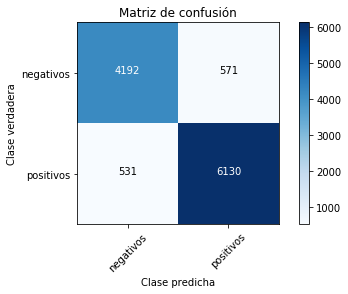

In [113]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_idf_vect_stemming = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_stemming, optimal_parameters, LinearSVC(), 30)
all_experiments_results.append(clf_tf_idf_vect_stemming)

### Binary stemming

Numero de caracteristicas:  (26653, 32900)

train time: 2.937s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9074775822609087
C: 0.1

Exactitud: 0.9073879551820728
F1_score: 0.904489814573916
Precision: 0.9050374543973974
Recall: 0.9039688028398523

             precision    recall  f1-score   support

   negative     0.8918    0.8839    0.8879      4738
   positive     0.9183    0.9240    0.9211      6686

avg / total     0.9073    0.9074    0.9073     11424

[[4188  550]
 [ 508 6178]]

Confusion matrix, without normalization
[[4188  550]
 [ 508 6178]]
CPU times: user 18.8 s, sys: 1.72 s, total: 20.5 s
Wall time: 20.8 s


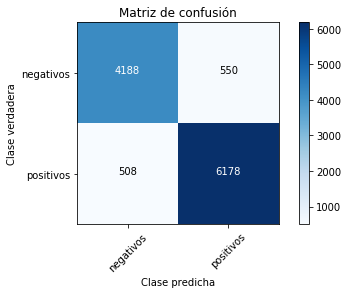

In [114]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_stemming = run_one_experiment(total_data_content, total_data_target, binary_vect_stemming, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_binary_vect_stemming)

## Experimento 3: Lematizacion

In [24]:
# Prueba del tokenizer
print(tokenize_lemmas(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaaa', 'comer', 'este', 'estaaaas', 'creer', 'en', 'mi', 'si', 'llover', 'mañana', 'tu', 'creer', 'en', 'mi', 'carta', 'aeiou']


In [27]:
tf_vect_lemmatize = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True)

tf_idf_vect_lemmatize = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True)

binary_vect_lemmatize = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True,
                binary=True)

### TF lemmatize

Numero de caracteristicas:  (26653, 36795)

train time: 9.194s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9108543128353281
C: 0.1

Exactitud: 0.9088760504201681
F1_score: 0.9059500646240274
Precision: 0.9068510286966824
Recall: 0.905117129509732

             precision    recall  f1-score   support

   negative     0.8957    0.8831    0.8894      4738
   positive     0.9180    0.9272    0.9225      6686

avg / total     0.9087    0.9089    0.9088     11424

[[4184  554]
 [ 487 6199]]

Confusion matrix, without normalization
[[4184  554]
 [ 487 6199]]
CPU times: user 2.15 s, sys: 7.87 s, total: 10 s
Wall time: 10.5 s


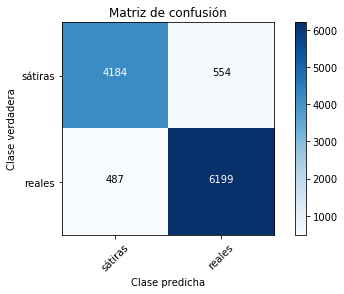

In [28]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, tf_vect_lemmatize, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_tf_vect_lemmatize)

### TF-IDF lemmatize

Numero de caracteristicas:  (26653, 36771)

train time: 2.839s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9088282744906765
C: 1

Exactitud: 0.905812324929972
F1_score: 0.903009531309755
Precision: 0.9035675191867992
Recall: 0.9024805979056585

             precision    recall  f1-score   support

   negative     0.8907    0.8824    0.8865      4763
   positive     0.9165    0.9225    0.9195      6661

avg / total     0.9057    0.9058    0.9057     11424

[[4203  560]
 [ 516 6145]]

Confusion matrix, without normalization
[[4203  560]
 [ 516 6145]]
CPU times: user 2.56 s, sys: 1.65 s, total: 4.21 s
Wall time: 4.56 s


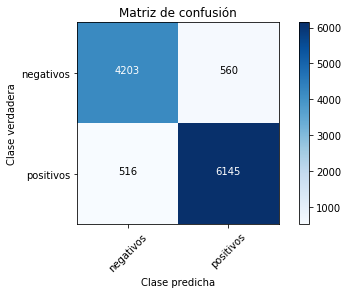

In [118]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_idf_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_lemmatize, optimal_parameters, LinearSVC(), 30)
all_experiments_results.append(clf_tf_idf_vect_lemmatize)

### Binary lemmatize

Numero de caracteristicas:  (26653, 36795)

train time: 2.771s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9087157168048625
C: 0.1

Exactitud: 0.9089635854341737
F1_score: 0.9060314190991305
Precision: 0.9069759566284792
Recall: 0.9051611660081922

             precision    recall  f1-score   support

   negative     0.8961    0.8829    0.8894      4738
   positive     0.9179    0.9275    0.9226      6686

avg / total     0.9088    0.9090    0.9089     11424

[[4183  555]
 [ 485 6201]]

Confusion matrix, without normalization
[[4183  555]
 [ 485 6201]]
CPU times: user 2.54 s, sys: 1.64 s, total: 4.18 s
Wall time: 4.44 s


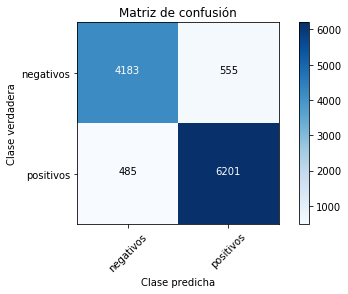

In [119]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, binary_vect_lemmatize, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_binary_vect_lemmatize)

## Experimento 4: Remocion de URLs

In [120]:
# Prueba de la tokenizacion sin urls
print(tokenize_no_urls(
    "holaaaa cómo http://estas creerías https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python mi si lloviera \t  mañana, tu crees en mi cartas ¡¡ ¿¿. aeiou"))

['holaaaa', 'cómo', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [121]:
tf_vect_no_urls = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True)

tf_idf_vect_no_urls = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True)

binary_vect_no_urls = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True,
                binary=True)

### TF sin URLs

Numero de caracteristicas:  (26653, 40405)

train time: 3.082s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9053765054590478
C: 0.1

Exactitud: 0.9051995798319328
F1_score: 0.9022360316030635
Precision: 0.9027671037616278
Recall: 0.901730265051107

             precision    recall  f1-score   support

   negative     0.8891    0.8814    0.8852      4738
   positive     0.9165    0.9221    0.9193      6686

avg / total     0.9051    0.9052    0.9051     11424

[[4176  562]
 [ 521 6165]]

Confusion matrix, without normalization
[[4176  562]
 [ 521 6165]]
CPU times: user 2.36 s, sys: 1.66 s, total: 4.01 s
Wall time: 4.58 s


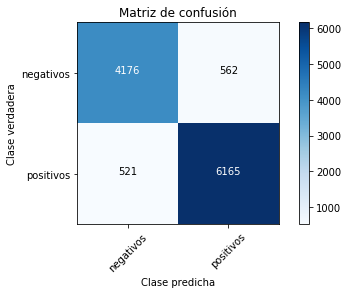

In [122]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_no_urls = run_one_experiment(total_data_content, total_data_target, tf_vect_no_urls, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_tf_vect_no_urls)

### TF-IDF sin URLs

Numero de caracteristicas:  (26653, 40441)

train time: 2.833s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9077402168611414
C: 1

Exactitud: 0.9023109243697479
F1_score: 0.899549875851458
Precision: 0.8995022959502732
Recall: 0.899597693941593

             precision    recall  f1-score   support

   negative     0.8825    0.8833    0.8829      4763
   positive     0.9165    0.9159    0.9162      6661

avg / total     0.9023    0.9023    0.9023     11424

[[4207  556]
 [ 560 6101]]

Confusion matrix, without normalization
[[4207  556]
 [ 560 6101]]
CPU times: user 2.4 s, sys: 1.62 s, total: 4.02 s
Wall time: 4.32 s


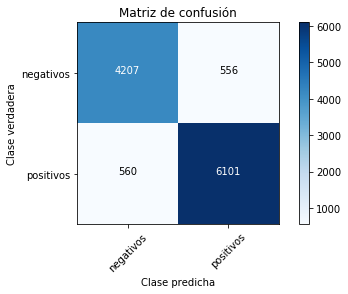

In [123]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_idf_vect_no_urls = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_no_urls, optimal_parameters, LinearSVC(), 30)
all_experiments_results.append(clf_tf_idf_vect_no_urls)

### Binary sin URLs

Numero de caracteristicas:  (26653, 40405)

train time: 2.591s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9048512362585825
C: 0.1

Exactitud: 0.9047619047619048
F1_score: 0.9017877608165237
Precision: 0.902304736883879
Recall: 0.9012948561455443

             precision    recall  f1-score   support

   negative     0.8885    0.8810    0.8847      4738
   positive     0.9161    0.9216    0.9189      6686

avg / total     0.9047    0.9048    0.9047     11424

[[4174  564]
 [ 524 6162]]

Confusion matrix, without normalization
[[4174  564]
 [ 524 6162]]
CPU times: user 2.23 s, sys: 1.46 s, total: 3.69 s
Wall time: 4 s


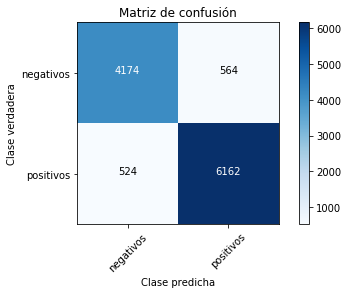

In [124]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_no_urls = run_one_experiment(total_data_content, total_data_target, binary_vect_no_urls, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_binary_vect_no_urls)

## Experimento 5: Remocion de letras repetidas

In [125]:
print(tokenize_norm_letters(
    "holaaaa cómo http://estas estaaaas creerías mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['hola', 'cómo', 'htp', 'estas', 'estas', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [126]:
tf_vect_norm_letters = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True)

tf_idf_vect_norm_letters = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True)

binary_vect_norm_letters = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True,
                binary=True)

### TF sin letras repetidas

Numero de caracteristicas:  (26653, 47550)

train time: 3.554s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9064645630885829
C: 0.1

Exactitud: 0.9054621848739496
F1_score: 0.9025282555339235
Precision: 0.9029655612244898
Recall: 0.9021083475902154

             precision    recall  f1-score   support

   negative     0.8888    0.8824    0.8856      4738
   positive     0.9171    0.9218    0.9194      6686

avg / total     0.9054    0.9055    0.9054     11424

[[4181  557]
 [ 523 6163]]

Confusion matrix, without normalization
[[4181  557]
 [ 523 6163]]
CPU times: user 7.42 s, sys: 1.62 s, total: 9.04 s
Wall time: 9.83 s


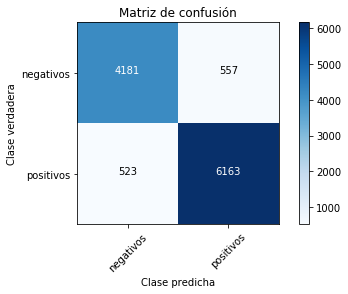

In [127]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, tf_vect_norm_letters, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_tf_vect_norm_letters)

### TF-IDF sin letras repetidas

Numero de caracteristicas:  (26653, 47582)

train time: 2.744s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9078152553183506
C: 1

Exactitud: 0.9017857142857143
F1_score: 0.8989613689380698
Precision: 0.8991066043562552
Recall: 0.8988182785516755

             precision    recall  f1-score   support

   negative     0.8832    0.8810    0.8821      4763
   positive     0.9150    0.9167    0.9159      6661

avg / total     0.9018    0.9018    0.9018     11424

[[4196  567]
 [ 555 6106]]

Confusion matrix, without normalization
[[4196  567]
 [ 555 6106]]
CPU times: user 6.95 s, sys: 1.69 s, total: 8.64 s
Wall time: 8.81 s


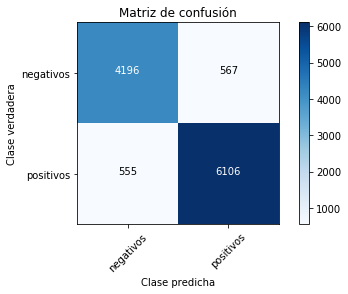

In [128]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_idf_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_norm_letters, optimal_parameters, LinearSVC(), 30)
all_experiments_results.append(clf_tf_idf_vect_norm_letters)

### Binary sin letras repetidas

Numero de caracteristicas:  (26653, 47550)

train time: 2.631s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9063144861741642
C: 0.1

Exactitud: 0.9037114845938375
F1_score: 0.900641792789433
Precision: 0.9014322550110293
Recall: 0.8999055125109744

             precision    recall  f1-score   support

   negative     0.8888    0.8776    0.8832      4738
   positive     0.9140    0.9222    0.9181      6686

avg / total     0.9036    0.9037    0.9036     11424

[[4158  580]
 [ 520 6166]]

Confusion matrix, without normalization
[[4158  580]
 [ 520 6166]]
CPU times: user 6.84 s, sys: 1.5 s, total: 8.34 s
Wall time: 8.72 s


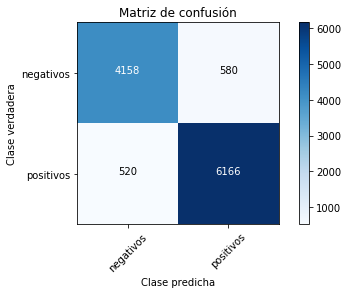

In [129]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, binary_vect_norm_letters, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_binary_vect_norm_letters)

## Experimento 6: Remocion de terminos poco comunes (pruning < 10)

In [130]:
tf_vect_pruning10 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=10)

tf_idf_vect_pruning10 = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=10)

binary_vect_pruning10 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True,
                min_df=10)

### TF pruning < 10

Numero de caracteristicas:  (26653, 4348)

train time: 3.216s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8999362173113721
C: 0.1

Exactitud: 0.8981967787114846
F1_score: 0.8950077125533595
Precision: 0.895556024018874
Recall: 0.8944870028879104

             precision    recall  f1-score   support

   negative     0.8807    0.8727    0.8767      4738
   positive     0.9104    0.9162    0.9133      6686

avg / total     0.8981    0.8982    0.8981     11424

[[4135  603]
 [ 560 6126]]

Confusion matrix, without normalization
[[4135  603]
 [ 560 6126]]
CPU times: user 2.32 s, sys: 1.77 s, total: 4.09 s
Wall time: 4.63 s


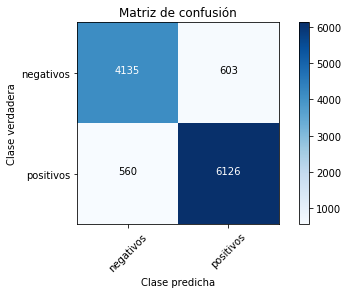

In [131]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, tf_vect_pruning10, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_tf_vect_pruning10)

### TF-IDF pruning < 10

Numero de caracteristicas:  (26653, 4348)

train time: 2.689s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8984729673957903
C: 1

Exactitud: 0.8942577030812325
F1_score: 0.8910843144369143
Precision: 0.8917303345021048
Recall: 0.8904783321544497

             precision    recall  f1-score   support

   negative     0.8773    0.8677    0.8725      4763
   positive     0.9062    0.9132    0.9097      6661

avg / total     0.8941    0.8943    0.8942     11424

[[4133  630]
 [ 578 6083]]

Confusion matrix, without normalization
[[4133  630]
 [ 578 6083]]
CPU times: user 2.32 s, sys: 1.72 s, total: 4.03 s
Wall time: 4.2 s


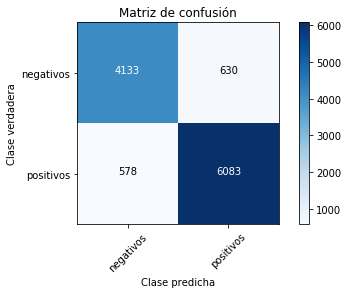

In [132]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_idf_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_pruning10, optimal_parameters, LinearSVC(), 30)
all_experiments_results.append(clf_tf_idf_vect_pruning10)

### Binary pruning < 10

Numero de caracteristicas:  (26653, 4348)

train time: 2.660s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8989231981390463
C: 0.1

Exactitud: 0.8951330532212886
F1_score: 0.8918650057149142
Precision: 0.8923430835242447
Recall: 0.8914083939185059

             precision    recall  f1-score   support

   negative     0.8766    0.8696    0.8731      4738
   positive     0.9081    0.9133    0.9107      6686

avg / total     0.8950    0.8951    0.8951     11424

[[4120  618]
 [ 580 6106]]

Confusion matrix, without normalization
[[4120  618]
 [ 580 6106]]
CPU times: user 2.32 s, sys: 1.69 s, total: 4.02 s
Wall time: 4.12 s


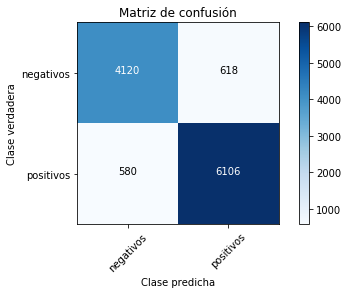

In [133]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, binary_vect_pruning10, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_binary_vect_pruning10)

## Experimento 7: Remocion de terminos poco comunes (pruning < 5)

In [134]:
tf_vect_pruning5 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=5)

tf_idf_vect_pruning5 = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=5)

binary_vect_pruning5 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True,
                min_df=5)

### TF pruning < 5

Numero de caracteristicas:  (26653, 7822)

train time: 3.150s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9043634862867219
C: 0.1

Exactitud: 0.9046743697478992
F1_score: 0.9017802422671222
Precision: 0.9019432419432419
Recall: 0.9016197792126766

             precision    recall  f1-score   support

   negative     0.8861    0.8837    0.8849      4738
   positive     0.9177    0.9195    0.9186      6686

avg / total     0.9046    0.9047    0.9047     11424

[[4187  551]
 [ 538 6148]]

Confusion matrix, without normalization
[[4187  551]
 [ 538 6148]]
CPU times: user 2.39 s, sys: 1.7 s, total: 4.09 s
Wall time: 4.59 s


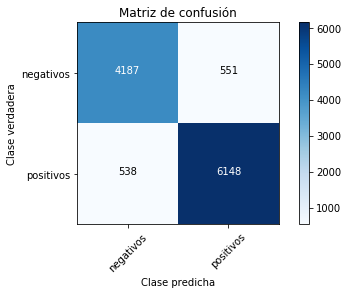

In [135]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, tf_vect_pruning5, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_tf_vect_pruning5)

### TF-IDF pruning < 5

Numero de caracteristicas:  (26653, 7854)

train time: 2.757s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9051513900874198
C: 1

Exactitud: 0.8964460784313726
F1_score: 0.8933153366174045
Precision: 0.8940582482993198
Recall: 0.8926241357221663

             precision    recall  f1-score   support

   negative     0.8805    0.8696    0.8750      4763
   positive     0.9076    0.9156    0.9116      6661

avg / total     0.8963    0.8964    0.8964     11424

[[4142  621]
 [ 562 6099]]

Confusion matrix, without normalization
[[4142  621]
 [ 562 6099]]
CPU times: user 2.27 s, sys: 1.72 s, total: 3.99 s
Wall time: 4.23 s


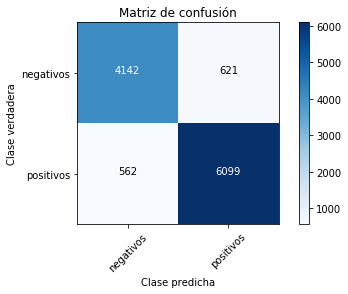

In [136]:
%%time
optimal_parameters = {'C': [1]}
clf_tf_idf_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_pruning5, optimal_parameters, LinearSVC(), 30)
all_experiments_results.append(clf_tf_idf_vect_pruning5)

### Binary pruning < 5

Numero de caracteristicas:  (26653, 7822)

train time: 2.764s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9038382170862567
C: 0.1

Exactitud: 0.9023984593837535
F1_score: 0.8993977390380781
Precision: 0.8997136104105661
Recall: 0.899091231881743

             precision    recall  f1-score   support

   negative     0.8844    0.8797    0.8820      4738
   positive     0.9151    0.9185    0.9168      6686

avg / total     0.9023    0.9024    0.9024     11424

[[4168  570]
 [ 545 6141]]

Confusion matrix, without normalization
[[4168  570]
 [ 545 6141]]
CPU times: user 2.23 s, sys: 1.7 s, total: 3.93 s
Wall time: 4.17 s


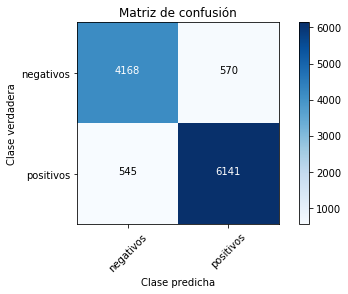

In [137]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, binary_vect_pruning5, optimal_parameters, LinearSVC(), 40)
all_experiments_results.append(clf_binary_vect_pruning5)

In [138]:
len(all_experiments_results)

24

In [139]:
# save_excel_results('result_es_twitter_sa_svm_lineal.xlsx', all_experiments_results)